In [ ]:
API_KEY = 'WGTR4V192TYX8F33'

In [ ]:
!pip install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.9 MB/s eta 0:00:00


In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import requests
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow
import datetime
from datetime import date
import mplfinance as mpf
from matplotlib.dates import DateFormatter, date2num
from datetime import datetime

In [ ]:
# Định dạng URL API với ngày hiện tại
url = 'https://www.alphavantage.co/query?function=FX_WEEKLY&from_symbol=EUR&to_symbol=USD&apikey=WGTR4V192TYX8F33'

# Gửi yêu cầu HTTP GET để lấy dữ liệu từ API
r = requests.get(url)
data = r.json()

# Chuyển dữ liệu về dạng DataFrame
df = pd.DataFrame(data['Time Series FX (Weekly)']).T
df

,1. open,2. high,3. low,4. close
2023-05-22,1.08192,1.08298,1.08060,1.08149
2023-05-19,1.08528,1.09046,1.07590,1.08019
2023-05-12,1.10209,1.10537,1.08468,1.08470
2023-05-05,1.10178,1.10917,1.09410,1.10174
2023-04-28,1.09861,1.10954,1.09610,1.10140
...,...,...,...,...
2004-04-30,1.17970,1.20090,1.17560,1.19790
2004-04-23,1.20150,1.20770,1.17760,1.18410
2004-04-16,1.20860,1.20970,1.18640,1.19930
2004-04-09,1.21210,1.22210,1.19790,1.20940


In [ ]:
df.describe()

,1. open,2. high,3. low,4. close
count,1000,1000,1000,1000
unique,949,933,916,926
top,1.34070,1.31070,1.10650,1.25120
freq,3,3,3,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2023-05-22 to 2004-04-02
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   1. open   1000 non-null   object
 1   2. high   1000 non-null   object
 2   3. low    1000 non-null   object
 3   4. close  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [ ]:

# Xử lý dữ liệu
df = df.rename(columns={'1. open': 'Open'})
df = df.rename(columns={'2. high': 'High'})
df = df.rename(columns={'3. low': 'Low'})
df = df.rename(columns={'4. close': 'Close'})
df = df.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
df = df.drop_duplicates()
df['Open'] = df['Open'].astype(float)
df['Close'] = df['Close'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Date'] = pd.to_datetime(df.index, format='%Y-%m-%d')  # Chuyển cột index thành cột 'Date'
df = df.set_index('Date')


# Lưu dữ liệu vào file CSV
df.to_csv('/content/drive/MyDrive/BTL_FOREX/data_daily.csv', index=True, mode='w')
data = pd.read_csv('/content/drive/MyDrive/BTL_FOREX/data_daily.csv')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data = data.sort_values(by='Date',ascending=True)

In [ ]:
data

,Date,Open,High,Low,Close
999,2004-04-02,1.21440,1.23880,1.20430,1.21300
998,2004-04-09,1.21210,1.22210,1.19790,1.20940
997,2004-04-16,1.20860,1.20970,1.18640,1.19930
996,2004-04-23,1.20150,1.20770,1.17760,1.18410
995,2004-04-30,1.17970,1.20090,1.17560,1.19790
...,...,...,...,...,...
4,2023-04-28,1.09861,1.10954,1.09610,1.10140
3,2023-05-05,1.10178,1.10917,1.09410,1.10174
2,2023-05-12,1.10209,1.10537,1.08468,1.08470
1,2023-05-19,1.08528,1.09046,1.07590,1.08019


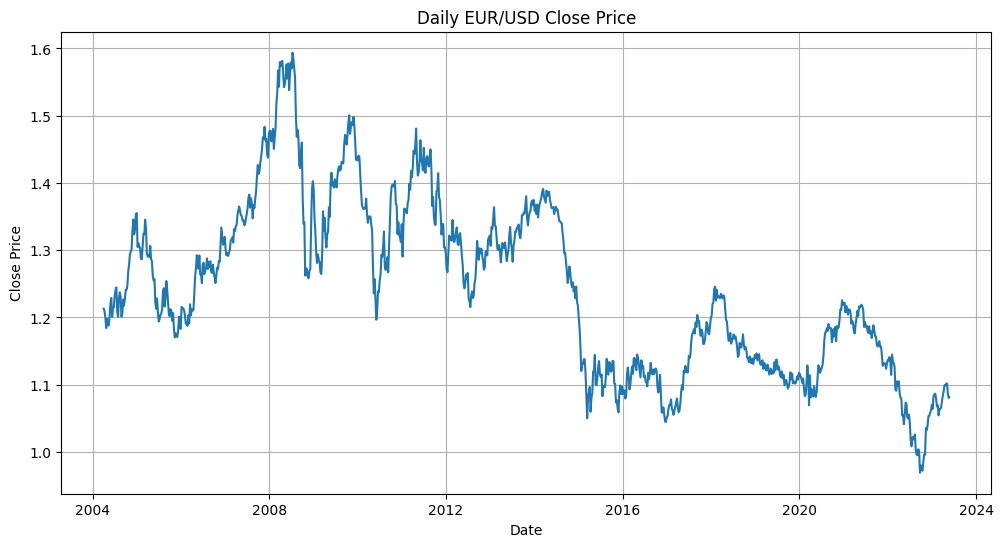

In [ ]:
# Vẽ biểu đồ giá trị Close theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close']) # Sử dụng chỉ số của DataFrame làm trục x
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Daily EUR/USD Close Price')
plt.grid()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 999 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Open    1000 non-null   float64       
 2   High    1000 non-null   float64       
 3   Low     1000 non-null   float64       
 4   Close   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 46.9 KB


In [ ]:
data.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

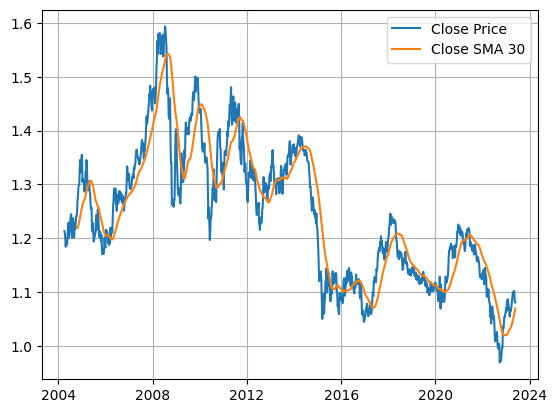

In [ ]:
# Tính toán đường trung bình động với cửa sổ 30 tuần
data['SMA_30_close'] = data['Close'].rolling(window=30).mean()

# Vẽ biểu đồ đường cho giá và đường trung bình động
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['SMA_30_close'], label='Close SMA 30')
plt.legend()
plt.grid()
plt.show()

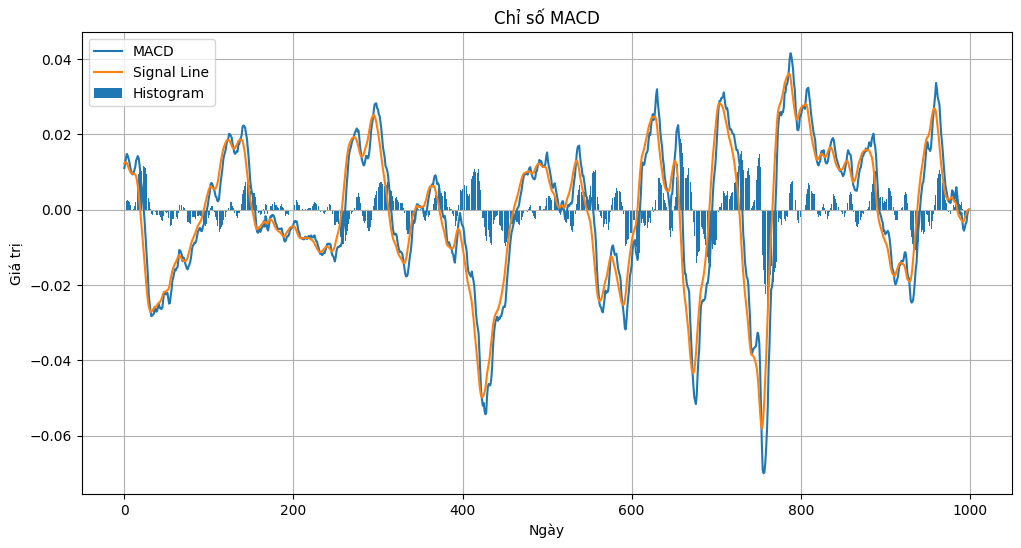

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hàm tính toán chỉ số MACD
def calculate_macd(data, short_period, long_period, signal_period):
    # Tính toán đường MACD
    data['EMA_short'] = data['Close'].ewm(span=short_period, adjust=False).mean()
    data['EMA_long'] = data['Close'].ewm(span=long_period, adjust=False).mean()
    data['MACD'] = data['EMA_short'] - data['EMA_long']
    
    # Tính toán đường tín hiệu (signal line)
    data['Signal'] = data['MACD'].ewm(span=signal_period, adjust=False).mean()
    
    # Tính toán histogram (MACD - Signal)
    data['Histogram'] = data['MACD'] - data['Signal']
    
    return data



# Chọn cột chứa dữ liệu giá cổ phiếu (đặt tên là 'Close' trong ví dụ này)
close_price = data['Close']

# Tham số cho chỉ số MACD
short_period = 12 # Kỳ quỹ ngắn
long_period = 26 # Kỳ quỹ dài
signal_period = 9 # Kỳ tín hiệu

# Tính toán chỉ số MACD
data = calculate_macd(data, short_period, long_period, signal_period)

# Trực quan hóa chỉ số MACD
plt.figure(figsize=(12, 6))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['Signal'], label='Signal Line')
plt.bar(data.index, data['Histogram'], label='Histogram')
plt.title('Chỉ số MACD')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True)
plt.show()


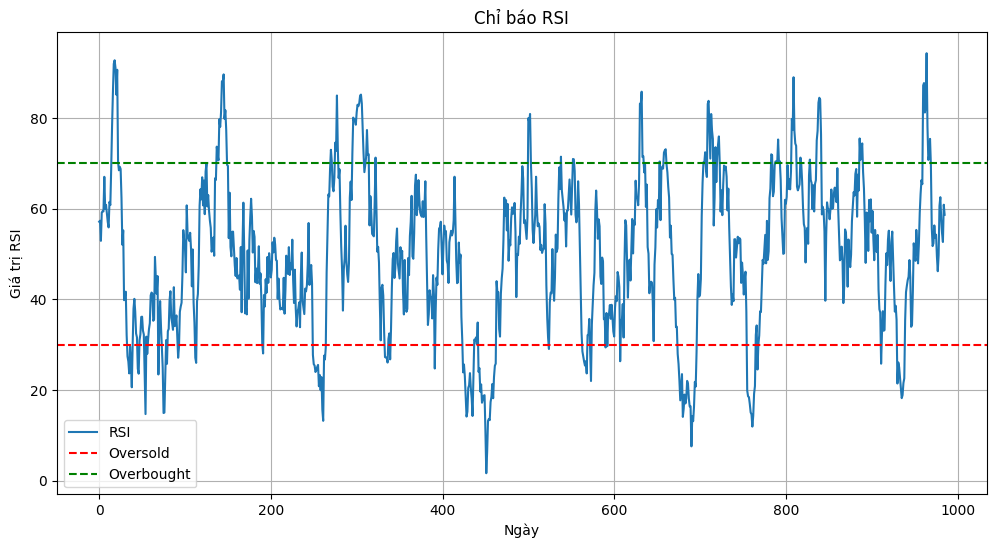

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Hàm tính toán chỉ báo RSI
def calculate_rsi(data, window_size):
    delta = data.diff(1)
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    avg_gain = up.rolling(window=window_size).mean()
    avg_loss = abs(down.rolling(window=window_size).mean())
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Chọn cột chứa dữ liệu giá cổ phiếu (đặt tên là 'Close' trong ví dụ này)
close_price = data['Close']

# Tham số cho chỉ báo RSI
window_size = 14 # Kích thước cửa sổ

# Tính toán chỉ báo RSI
rsi = calculate_rsi(close_price, window_size)

# Trực quan hóa chỉ báo RSI
plt.figure(figsize=(12, 6))
plt.plot(rsi, label='RSI')
plt.axhline(y=30, color='red', linestyle='--', label='Oversold')
plt.axhline(y=70, color='green', linestyle='--', label='Overbought')
plt.title('Chỉ báo RSI')
plt.xlabel('Ngày')
plt.ylabel('Giá trị RSI')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
data_open = series_to_supervised(data[['Open']].iloc[1:], n_in=30, n_out=1, dropnan=True)

data_open

In [ ]:
data_close = series_to_supervised(data[['Close']].iloc[1:], n_in=30, n_out=1, dropnan=True)

data_close

In [ ]:
data_NN = []
data_NN.append(data_open)
data_NN.append(data_close)
data_NN = np.array(data_NN)

In [ ]:
data_NN = data_NN.transpose(1, 2, 0)

data_NN.shape

In [ ]:
data_NN[:, :, 0] = (data_NN[:, :, 0] - data['Close'].min()) / (data['Close'].max() - data['Close'].min())

In [ ]:
data_NN[:, :, 1] = (data_NN[:, :, 1] - data['Open'].min()) / (data['Open'].max() - data['Open'].min())

In [ ]:
data_NN.max()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_NN[:, :-1, :], data_NN[:,[-1], :], test_size = 0.2, random_state = 42, shuffle = False)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
import tensorflow as tf
def get_model_RNN():
  input = tf.keras.layers.Input(shape = (30, 2))

  rnn = tf.keras.layers.LSTM(units=50, return_sequences=True, activation='relu')(input)
  rnn = tf.keras.layers.LSTM(units=50, return_sequences=True, activation='relu')(rnn)
  rnn = tf.keras.layers.BatchNormalization()(rnn)

  rnn = tf.keras.layers.LSTM(units=50, return_sequences=True, activation='relu')(rnn)
  rnn = tf.keras.layers.LSTM(units=50, return_sequences=True, activation='relu')(rnn)
  rnn = tf.keras.layers.BatchNormalization()(rnn)

  rnn = tf.keras.layers.Flatten(name = 'flatten')(rnn)

  rnn = tf.keras.layers.Dense(512, activation='relu')(rnn)
  rnn = tf.keras.layers.Dropout(rate = 0.2)(rnn)
  rnn = tf.keras.layers.Dense(256, activation='relu')(rnn)
  rnn = tf.keras.layers.Dropout(rate = 0.2)(rnn)

  open = tf.keras.layers.Dense(1, activation='linear')(rnn)
  close = tf.keras.layers.Dense(1, activation='linear')(rnn)

  model = tf.keras.Model(inputs=input, outputs=[open, close])
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001, beta_1 = 0.9, beta_2 = 0.999, epsilon=1e-7)
  model.compile(optimizer=optimizer, loss='MeanSquaredError', metrics=['MeanSquaredError'])

  return model

In [ ]:
model = tf.keras.models.load_model('/content/CNN.h5')

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_train[0].shape

In [ ]:
def reset_data(data, data_NN, y_train, y_test):
  open_pred = np.vstack((y_train[0], y_test[0]))
  close_pred = np.vstack((y_train[1], y_test[1]))
  open_reset = open_pred + np.array(data_NN[:,-1,0]).reshape(-1, 1)
  close_reset = close_pred + np.array(data_NN[:,-1,1]).reshape(-1, 1)
  n_missing = data.shape[0] - data_NN.shape[0]
  open_pred = np.concatenate((np.zeros((n_missing, 1)), open_pred))
  open_reset = np.concatenate((np.zeros((n_missing, 1)), open_reset))
  close_pred = np.concatenate((np.zeros((n_missing, 1)), close_pred))
  close_reset = np.concatenate((np.zeros((n_missing, 1)), close_reset))
  data['Open_pred'] = open_pred
  data['Open_pred_reset'] = open_reset
  data['Close_pred'] = close_pred
  data['Close_pred_reset'] = close_reset


In [ ]:
reset_data(data, data_NN, y_pred_train, y_pred_test)

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'], data['Open1'], label='Open1')
plt.plot(data['Date'], data['Open_pred'], label='Open1 Pred')
plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Open1'].iloc[:-y_test.shape[0]], label='Open1')
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Open_pred'].iloc[:-y_test.shape[0]], label='Open1 Pred Train')
plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Open1'].iloc[-y_test.shape[0]:], label='Open1')
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Open_pred'].iloc[-y_test.shape[0]:], label='Open1 Pred Test')
plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'], data['Close1'], label='Close1')
plt.plot(data['Date'], data['Close_pred'], label='Close1 Pred')
plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Close1'].iloc[:-y_test.shape[0]], label='Close1')
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Close_pred'].iloc[:-y_test.shape[0]], label='Close1 Pred Train')
plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close1'].iloc[-y_test.shape[0]:], label='Close1')
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close_pred'].iloc[-y_test.shape[0]:], label='Close1 Pred Test')
plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['Open_pred_reset'], label='Open Pred')
plt.legend()
plt.grid()

In [ ]:
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Open_pred_reset'].iloc[:-y_test.shape[0]], label='Open Pred Train')
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Open'].iloc[:-y_test.shape[0]], label='Close')

plt.legend()
plt.grid()

In [ ]:
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Open_pred_reset'].iloc[-y_test.shape[0]:], label='Open Pred Test')
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Open'].iloc[-y_test.shape[0]:], label='Open')

plt.legend()
plt.grid()

In [ ]:
plt.figure(figsize=(15,4), dpi=100)
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['Close_pred_reset'], label='Close Pred')
plt.legend()
plt.grid()

In [ ]:
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Close_pred_reset'].iloc[:-y_test.shape[0]], label='Close Pred Train')
plt.plot(data['Date'].iloc[:-y_test.shape[0]], data['Close'].iloc[:-y_test.shape[0]], label='Close')

plt.legend()
plt.grid()

In [ ]:
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close_pred_reset'].iloc[-y_test.shape[0]:], label='Close Pred Test')
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close'].iloc[-y_test.shape[0]:], label='Close')

plt.legend()
plt.grid()

In [ ]:
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close_pred_reset'].iloc[-y_test.shape[0]:] - data['Open_pred_reset'].iloc[-y_test.shape[0]:], label='Close - Open Pred')
plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close'].iloc[-y_test.shape[0]:] - data['Open'].iloc[-y_test.shape[0]:], label='Close - Open')
plt.hlines(0, xmin=min(data['Date'].iloc[-y_test.shape[0]:]), xmax=max(data['Date'].iloc[-y_test.shape[0]:]), color='red', linestyle='-')
plt.legend()
plt.grid()

In [ ]:
def visual(input, predict):
  plt.plot(input['Date'].iloc[-4:], input['Open'].iloc[-4:], label='Open',c='green')
  plt.scatter(input['Date'].iloc[-4:], input['Open'].iloc[-4:],c='green')
  plt.plot(input['Date'].iloc[-4:], input['Close'].iloc[-4:], label='Close',c='red')
  plt.scatter(input['Date'].iloc[-4:], input['Close'].iloc[-4:],c='red')
  plt.scatter(predict['Date'], predict['Open'], alpha=0.75 ,label='Open Predict',c='green')
  plt.scatter(predict['Date'], predict['Close'], alpha=0.75, label='Close Predict',c='red')

  plt.xticks(rotation=45)
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
def predict(input,  model):
  reset = np.array(input.iloc[-2,1:3])

  open_data = input[['Date', 'Open']]
  close_data = input[['Date', 'Close']]

  ts_diff_open = np.diff([open_data['Open']])
  print(ts_diff_open.shape)
  ts_diff_close = np.diff([close_data['Close']])

  data_NN = np.hstack((ts_diff_open.reshape(-1, 1), ts_diff_close.reshape(-1, 1)))

  predict = model.predict(data_NN[None, ...])
  predict = pd.Series({'Date': input.iloc[-1, 0] + pd.Timedelta(days=7), 'Open': predict[0] + reset[0], 'Close': predict[1] + reset[1]})

  visual(input, predict)

  return predict

In [ ]:
t = raw_data[['Date', 'Open', 'Close']].sort_values(by='Date', ascending=True).iloc[-56:]

In [ ]:
y_pred = predict(t, model)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("open")
print("r2 score: ", r2_score(data['Open'].iloc[-y_test.shape[0]:], data['Open_pred_reset'].iloc[-y_test.shape[0]:]))
print("mae: ", mean_absolute_error(data['Open'].iloc[-y_test.shape[0]:], data['Open_pred_reset'].iloc[-y_test.shape[0]:]))
print("mse: ", mean_squared_error(data['Open'].iloc[-y_test.shape[0]:], data['Open_pred_reset'].iloc[-y_test.shape[0]:]))

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("close")
print("r2 score: ", r2_score(data['Close'].iloc[-y_test.shape[0]:], data['Close_pred_reset'].iloc[-y_test.shape[0]:]))
print("mae: ", mean_absolute_error(data['Close'].iloc[-y_test.shape[0]:], data['Close_pred_reset'].iloc[-y_test.shape[0]:]))
print("mse: ", mean_squared_error(data['Close'].iloc[-y_test.shape[0]:], data['Close_pred_reset'].iloc[-y_test.shape[0]:]))

In [ ]:
# Huấn luyện mô hình
model = get_model_RNN()

model.summary()

In [ ]:

model.fit(X_train, y_train, epochs=100, batch_size=32)

# Đánh giá mô hình trên dữ liệu kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên dữ liệu kiểm tra:', loss)



In [ ]:
y_pred = model.predict(X_train)

In [ ]:
plt.plot(np.arange(y_train.shape[0]), y_pred[0])
plt.plot(np.arange(y_train.shape[0]), y_train[:, 0])

In [ ]:
y_test.shape[0]

In [ ]:
y_train

In [ ]:
# Lưu mô hình vào Google Drive
model.save('/content/drive/MyDrive/BTL_FOREX/my_model.h5')


In [ ]:
from keras.models import load_model

# Load lại mô hình từ Google Drive
loaded_model = load_model('/content/drive/MyDrive/BTL_FOREX/my_model.h5')


In [ ]:
# plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close_pred_reset'].iloc[-y_test.shape[0]:], label='Close Pred Test')
# plt.plot(data['Date'].iloc[-y_test.shape[0]:], data['Close'].iloc[-y_test.shape[0]:], label='Close')

# plt.legend()
# plt.grid()